# Testing Enviornment

In [212]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [213]:
%run ../test/test_algorithms.py

........
----------------------------------------------------------------------
Ran 8 tests in 0.141s

OK


In [214]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.048s

OK


In [215]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [216]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [14]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [15]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [285]:
%run ../tools/predictorsI.py

In [286]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [287]:
op0.create_bilstm()

In [288]:
op0.model_blueprint()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 25, 100)           20800     
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [289]:
op0.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 44ms/step - loss: 17.0388 - mean_squared_error: 17.0388 - val_loss: 16.1110 - val_mean_squared_error: 16.1110
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 1.6438 - mean_squared_error: 1.6438 - val_loss: 0.5050 - val_mean_squared_error: 0.5050
Epoch 3/10
20/20 [==============================] - 0s 19ms/step - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.2510 - val_mean_squared_error: 0.2510
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1952 - val_mean_squared_error: 0.1952
Epoch 5/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 6/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1815 - val_mean_squared_error: 0.1815
Epoch 7/10
20/20 [============

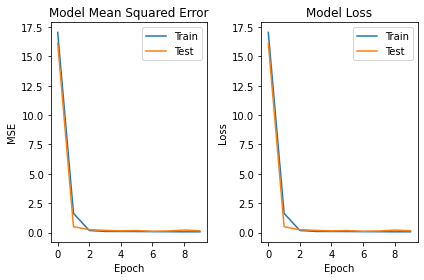

In [290]:
op0.show_performance()

In [291]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [292]:
nice = op0.predict(oyea)
nice

,Bidirectional LSTM
0,7.466393
1,7.250769
2,7.548186
3,7.609942
4,7.256098
5,7.257919
6,7.884319


In [293]:
op1.create_lstm()

In [294]:
op1.model_blueprint()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 25, 40)            6720      
_________________________________________________________________
lstm_34 (LSTM)               (None, 25, 50)            18200     
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [295]:
op1.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 53ms/step - loss: 23.0704 - mean_squared_error: 23.0704 - val_loss: 6.8943 - val_mean_squared_error: 6.8943
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 6.4319 - mean_squared_error: 6.4319 - val_loss: 7.8420 - val_mean_squared_error: 7.8420
Epoch 3/10
20/20 [==============================] - 1s 26ms/step - loss: 0.6113 - mean_squared_error: 0.6113 - val_loss: 0.5386 - val_mean_squared_error: 0.5386
Epoch 4/10
20/20 [==============================] - 1s 25ms/step - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 5/10
20/20 [==============================] - 1s 26ms/step - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 6/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 7/10
20/20 [==============

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(300,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [255]:
%run ../tools/predictorsIII.py

In [256]:
len(prices)

279

In [268]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [258]:
op4.create_cnnlstm()

In [259]:
op4.model_blueprint()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_74 (TimeDis (None, None, 11, 64)      192       
_________________________________________________________________
time_distributed_75 (TimeDis (None, None, 10, 32)      4128      
_________________________________________________________________
time_distributed_76 (TimeDis (None, None, 5, 32)       0         
_________________________________________________________________
time_distributed_77 (TimeDis (None, None, 160)         0         
_________________________________________________________________
lstm_25 (LSTM)               (None, None, 50)          42200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_23 (Dense)             (None, 20)              

In [260]:
op4.fit_model(10)

Epoch 1/10
19/19 [==============================] - 1s 28ms/step - loss: 27.4911 - mean_squared_error: 27.4911 - val_loss: 40.5169 - val_mean_squared_error: 40.5169
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 15.2919 - mean_squared_error: 15.2919 - val_loss: 18.3411 - val_mean_squared_error: 18.3411
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 6.0431 - mean_squared_error: 6.0431 - val_loss: 6.7069 - val_mean_squared_error: 6.7069
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 1.6419 - mean_squared_error: 1.6419 - val_loss: 0.9629 - val_mean_squared_error: 0.9629
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2709 - mean_squared_error: 0.2709 - val_loss: 0.5122 - val_mean_squared_error: 0.5122
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.4927 - val_mean_squared_error: 0.4927
Epoch 7/10
19/19 [=============

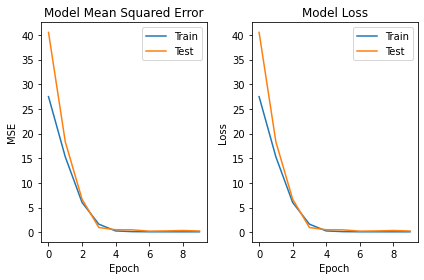

In [261]:
op4.show_performance()

In [262]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [266]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

,CNN-LSTM
0,7.625943
1,7.442990
2,8.041752
3,7.472704
4,7.698625
5,7.770092
6,7.436638
7,8.211632
8,8.182108
9,8.023966


<AxesSubplot:>

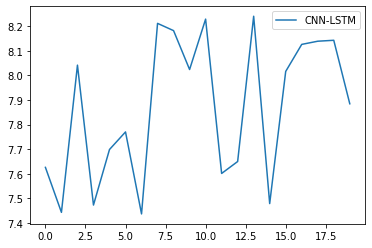

In [267]:
nice.plot()